In [1]:
import matplotlib.pyplot as plt
import time
import gym

In [2]:
env = gym.make('virtualworld-v0')

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Activation
from tensorflow.keras.optimizers import Adam

from rl.agents import DQNAgent

In [ ]:
model = Sequential()

model.add(Flatten(input_shape=(1,)+(6,)))

model.add(Dense(128, activation='relu'))

model.add(Dense(254, activation='relu'))

model.add(Dense(254, activation='relu'))

model.add(Dense(128, activation='relu'))

model.add(Dense(3, activation='linear'))

In [ ]:
model.summary()

In [ ]:
from rl.memory import SequentialMemory

memory = SequentialMemory(limit=1500000, window_length=1)

In [ ]:
from rl.policy import LinearAnnealedPolicy, EpsGreedyQPolicy
policy = LinearAnnealedPolicy(EpsGreedyQPolicy(),
                             attr='eps', 
                             value_max=1.0,
                             value_min=0.1,
                             value_test=0.05,
                             nb_steps=3000000)

In [ ]:
dqn = DQNAgent(model=model,
              policy=policy, 
              nb_actions=3,
              memory=memory,
              nb_steps_warmup=1000,
              target_model_update=5000,
              batch_size=64,
              gamma=0.99)

In [ ]:
dqn.compile(Adam(learning_rate=1e-3), metrics=['mae'])

In [ ]:
dqn.fit(env, nb_steps=6000000, visualize=False, verbose=1.0)

        


In [ ]:
dqn.save_weights("dqn_v0.0.1.h5f", overwrite=True)

In [ ]:
dqn.test(env, nb_episodes=1, visualize=True)
env.close()

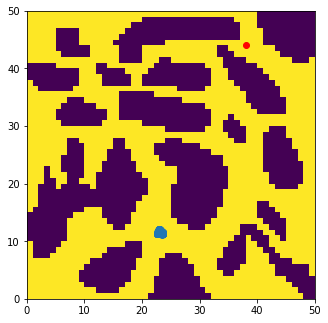

In [7]:
plt.ion()

observation = env.reset()
env.sleep = 0.5

fig = plt.figure()

axes = fig.add_axes([0,0,1,1])
axes.set_aspect('equal')#set the x and y axes to the same scale
axes.pcolormesh(env.world)
axes.scatter(env.world_objective[0], env.world_objective[1], color='r')

agent_path_x = []
agent_path_y = []

rewards = []
actions = []
for i in range(300):   
    agent_path_x.append(env.agent_pos[0])
    agent_path_y.append(env.agent_pos[1])
    
    action = env.action_space.sample()
    
    observation, reward, done, info = env.step(action)
    
    rewards.append(reward)
    actions.append(action)

axes.scatter(agent_path_x, agent_path_y)